<a href="https://colab.research.google.com/github/ulrikSebastienR/Colab-python-diaries/blob/master/bb_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://seaborn.pydata.org/introduction.html

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set()
tips = sns.load_dataset("tips")
print(type(tips))
print(tips)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


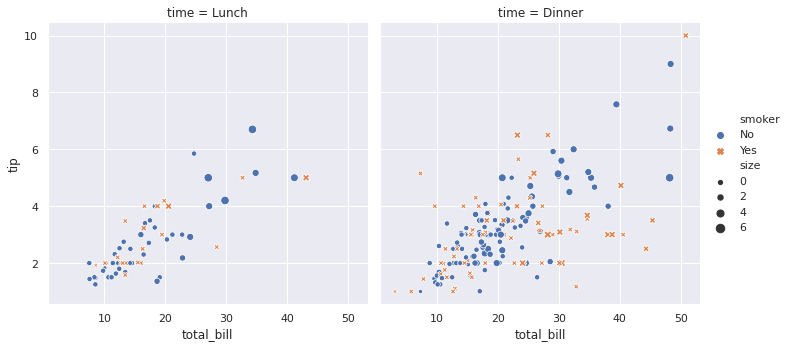

In [4]:
sns.relplot(x='total_bill',y='tip', col = 'time', hue = 'smoker', style = 'smoker', size = 'size', data = tips)

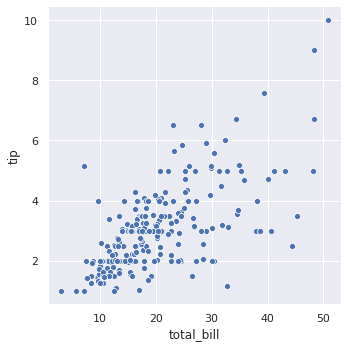

In [5]:
sns.relplot(x='total_bill',y='tip', data = tips)

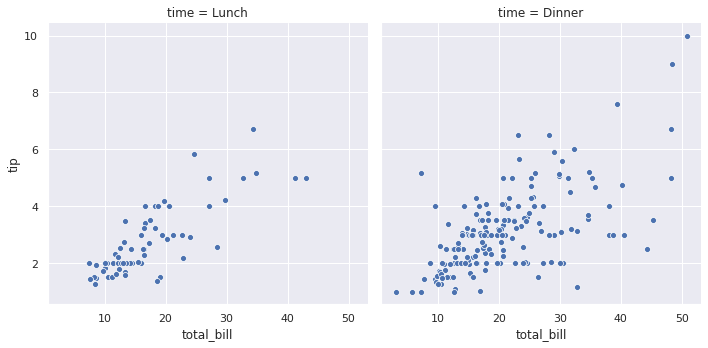

In [6]:
sns.relplot(x='total_bill',y='tip', col = 'time', data = tips)

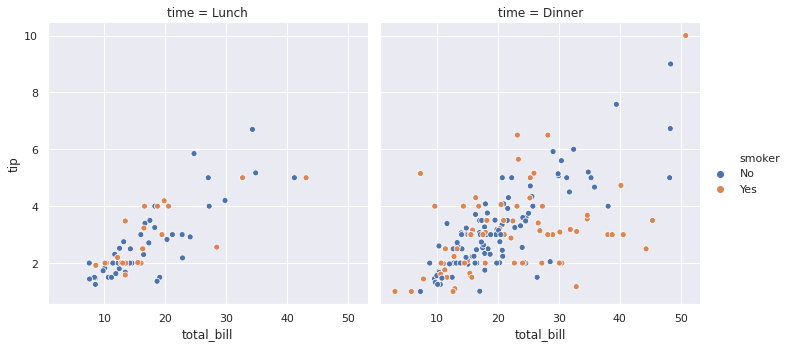

In [7]:
sns.relplot(x='total_bill',y='tip', col = 'time', hue = 'smoker', data = tips)